Solution for problem 1:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

creating a datapoint in 2d using numpy.random.rand whose each component is in range [b,a) using y=(b-a)x+a where x $\in$ [b,a) --
Datapoints belonging to [0,5.5) $\times$ [0,5.5) are positively labelled .
Datapoints belonging to [6,10) $\times$ [6,10) are negatively labelled.
Since the regions [0,5.5) $\times$ [0,5.5) and region [6,10) $\times$ [6,10) have no overlapp ,the dataset is always linearly separable.

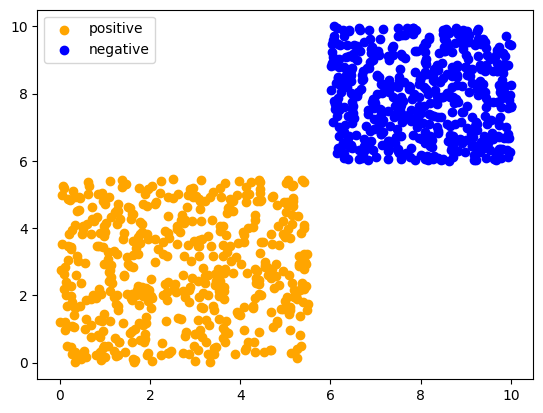

In [ ]:
points=np.random.rand(2,500)
points1=np.random.rand(2,500)
positive_points=np.zeros((2,500))
negative_points=np.zeros((2,500))


#global keyword is used to modify things outside if functions by refering them
def pos_neg_points(b1,a1,b2,a2):
 #points[0][0] and points[1][0] constitue the vector points[0]
 global points,points1,positive_points,negative_points
 positive_points=points*(b1-a1)+a1
 #print(positive_points.shape)
 #points[0][0] and points[1][0] constitue the vector points[0]

 negative_points=points1*(b2-a2)+a2
 #print(negative_points)

#plotting the datapoints
pos_neg_points(5.5,0,10,6)
plt.scatter(positive_points[0,0:500],positive_points[1,0:500],color='orange')
plt.scatter(negative_points[0,0:500],negative_points[1,0:500],color='blue')
plt.legend(['positive','negative'])

negative_points[i] vector has components --i)negative_points[i][0],ii) negative_points[i][1].
Augmenting each point to account for intercept of classifier.
now each datapoint will have three components --third component =1.and putting all datapoints (+ve or -ve ) in point numpy array

In [ ]:
point=np.ones((3,1000))
label=np.zeros((1000))
def combine():
 global point,label
 point[0:2,0:500]=positive_points[0:2,0:500]
 label[0:500]=-1
 label[500:]=1
 point[0:2,500:1000]=negative_points[0:2,0:500]
 #print(point.shape)
 #point[i] has three components --neg_point[i][0],neg_point[i][1],neg_point[i][2]=1 and has 1000 column vectors (datapoints augmented by third component =1)

combine()



Training the model

In [ ]:



#point[i,0:3] has the dimension (3,) and w.T is (1,3) result of np.dot(w.T,point) has dimension (1,) in np.array

#Initialising the w
w=np.zeros((3,1))
#column vector



def loss_f(w):
 matrix=np.multiply(np.dot(w.T,point),label)
 if((matrix > 0).sum()==matrix.size): return 0
 else: return 1


#no_of_iter=no of times w vector is modified  (k) mentioned in the question
no_of_iter=0
#to refer to it u need to use global keyword bec u cant modify it but u can access it

def Train(w):
 ok=True
 while(ok):
  for i in range(0,1000):
   global no_of_iter
   x=np.zeros((3,1))
   x[0:3,0]=point[0:3,i]
   if label[i]*(np.dot(w.T,x)).item()<=0:
    no_of_iter=no_of_iter+1
    w=w+label[i]*x
  if(loss_f(w)>0): ok=True
  else: ok=False
 return w

w=Train(w)
print(w)
print(loss_f(w))


[[  5.11958064]
 [  3.44545701]
 [-48.        ]]
0


Plotting the classifier with the dataset

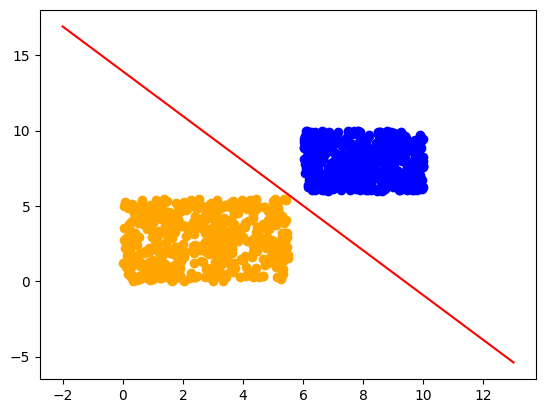

In [ ]:
line_xval=np.linspace(-2,13,100)

plt.plot(line_xval,-w[2][0]/w[1][0]+(-w[0][0]/w[1][0]*line_xval),color='red')
#positive datapoints
plt.scatter(point[0,0:500],point[1,0:500],color='orange')
#negative datapoints
plt.scatter(point[0,500:1000],point[1,500:1000],color='blue')



Level of Separability($\gamma$)--smallest distance between any two positively and negatively classified points.
Lets take different values of $\gamma$ and observe no of iterations in which the perceptron algorithm converges.

In [ ]:
#lets see the level of separability for above

def level_of_sep():
 gamma=1000
 for i in range(0,500):
   for j in range(500,1000):
      global point
      gamma=min(gamma,np.linalg.norm((point[0:2,i]-point[0:2,j]),2))
 print("gamma",gamma,"k(no_of_iter)",no_of_iter)

level_of_sep()
#no_of_iter=no of times w vector is modified


gamma 1.1114610716889568 k(no_of_iter) 114


Lets try above for more 5 differnt values of level of separability($\gamma$)

In [ ]:
for i in range(5,12):
   print(i-4,"th different level of separability")
   pos_neg_points(5.5,0,25,5.5+i)
   combine()
   w=np.zeros((3,1))
   w[2][0]=1
   no_of_iter=0
   Train(w)
   level_of_sep()



1 th different level of separability
gamma 8.16727855187346 k(no_of_iter) 40
2 th different level of separability
gamma 9.515321476101592 k(no_of_iter) 35
3 th different level of separability
gamma 10.863483714621118 k(no_of_iter) 36
4 th different level of separability
gamma 12.211725750962733 k(no_of_iter) 36
5 th different level of separability
gamma 13.560023782804537 k(no_of_iter) 36
6 th different level of separability
gamma 14.908362617616094 k(no_of_iter) 45
7 th different level of separability
gamma 16.256732102764428 k(no_of_iter) 37


       OBSERVATION
We can observe easily that larger the separability ,its easy to separate the dataset lineary(i.e. with less no of iterations)..

Solution for problem 2:

We have to be very much careful in choosing a loss function.First point is that we need to take its gradient .This function must be differentiable w.r.t w.
logistic loss is differentiable loss function proxy for 0-1 loss($I_{y_iw^Tx_i<=0}$) function
$fl(y_i,x_i)=\log(1+e^{-y_iw^Tx_i})$.This is Batch Gradient Descent

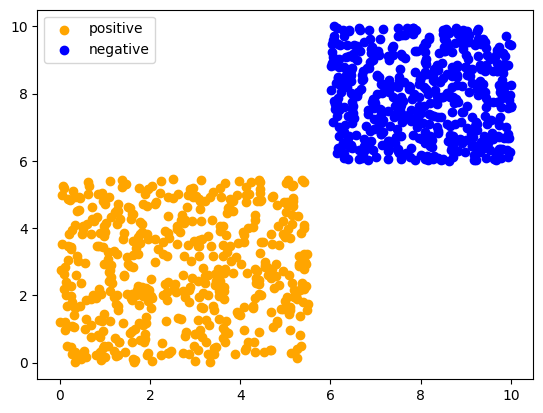

In [ ]:

#considering the above same problem
pos_neg_points(5.5,0,10,6)
combine()




#positive labelled points
plt.scatter(point[0,0:500],point[1,0:500],color='orange')


#plotting the negative labelled points
plt.scatter(point[0,500:1000],point[1,500:1000],color='blue')
plt.legend(['positive','negative'])

#loss sum average
def fl(w):
  sum=0
  for i in range(0,1000):
    x=np.ones((3,1))
    x[0:3,0]=point[0:3,i]
    sum=sum+np.log(1+np.exp(-label[i]*(np.dot(w.T,x).item())))
  return sum/1000


In [ ]:
     
#some part of derivate of loss w.r.t w
def derivative(w,x,label):
 return (-label)/(np.exp(label*(np.dot(w.T,x).item()))+1)

def evaluate_gradient(w):
   grad=np.zeros((3,1))
   for i in range(0,1000):
      x=np.ones((3,1))
      x[0:3,0]=point[0:3,i]
      grad[0:3,0]=grad[0:3,0]+derivative(w,x,label[i])*x[0:3,0]
   return grad/1000

Lets Train the Model with the help of simple gradient descent(Batch).

w parameter value when 1000 epochs are done in batch gradient descent: [[  1.21517547]
 [  1.23069098]
 [-13.5474043 ]] corresponding loss : 0.016260369638469968


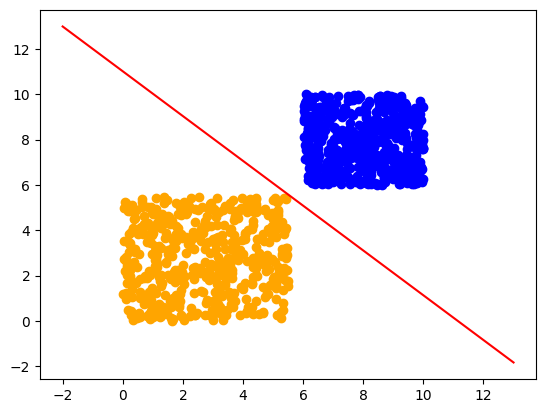

In [ ]:
w=np.zeros((3,1))
ok=1000
#lets take step size to be one
eta=1
while(ok):
  w=w-eta*evaluate_gradient(w)
  ok=ok-1

line_xval=np.linspace(-2,13,100)
print("w parameter value when 1000 epochs are done in batch gradient descent:",w,"corresponding loss :",fl(w))

#value of fp(x)=0 => w[0][0]*x[0][0]+
plt.plot(line_xval,-w[2][0]/w[1][0]+(-w[0][0]/w[1][0]*line_xval),color='red')
#positive datapoints
plt.scatter(point[0,0:500],point[1,0:500],color='orange')
#0 labelled datapoints
plt.scatter(point[0,500:1000],point[1,500:1000],color='blue')



Solution for problem 3:

Data Set Creation
$x^2+y^2=25$ and $x^2+y^2=64$ are the two circles.We will create Circumferential Dataset with help of numpy.random.rand()..
e.g.
$x^2+y^2=25$
generate y $\in$ [-5,5)  at each value x find y

(2, 500)


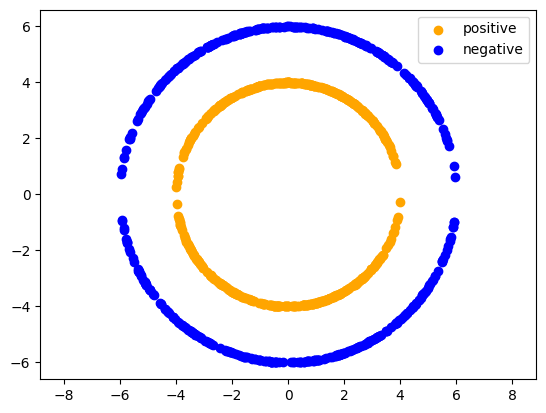

In [ ]:
pts=np.random.rand(1,500)
pts1=np.random.rand(1,500)
positive_pts=np.zeros((2,500))
negative_pts=np.zeros((2,500))
positive_pts[0,0:250]=8*pts[0,0:250]-4
positive_pts[0,250:500]=8*pts[0,250:500]-4
positive_pts[1,0:250]=np.sqrt(16-positive_pts[0,0:250]**2)
positive_pts[1,250:500]=-np.sqrt(16-positive_pts[0,250:500]**2)
print(positive_pts.shape)
#equalising the sacles on both axes
plt.axis('equal')
plt.scatter(positive_pts[0,0:],positive_pts[1,0:],color='orange')

negative_pts[0,0:250]=12*pts1[0,0:250]-6
negative_pts[0,250:500]=12*pts1[0,250:500]-6
negative_pts[1,0:250]=np.sqrt(36-negative_pts[0,0:250]**2)
negative_pts[1,250:500]=-np.sqrt(36-negative_pts[0,250:500]**2)
plt.scatter(negative_pts[0,0:],negative_pts[1,0:],color='blue')

plt.legend(['positive','negative'])


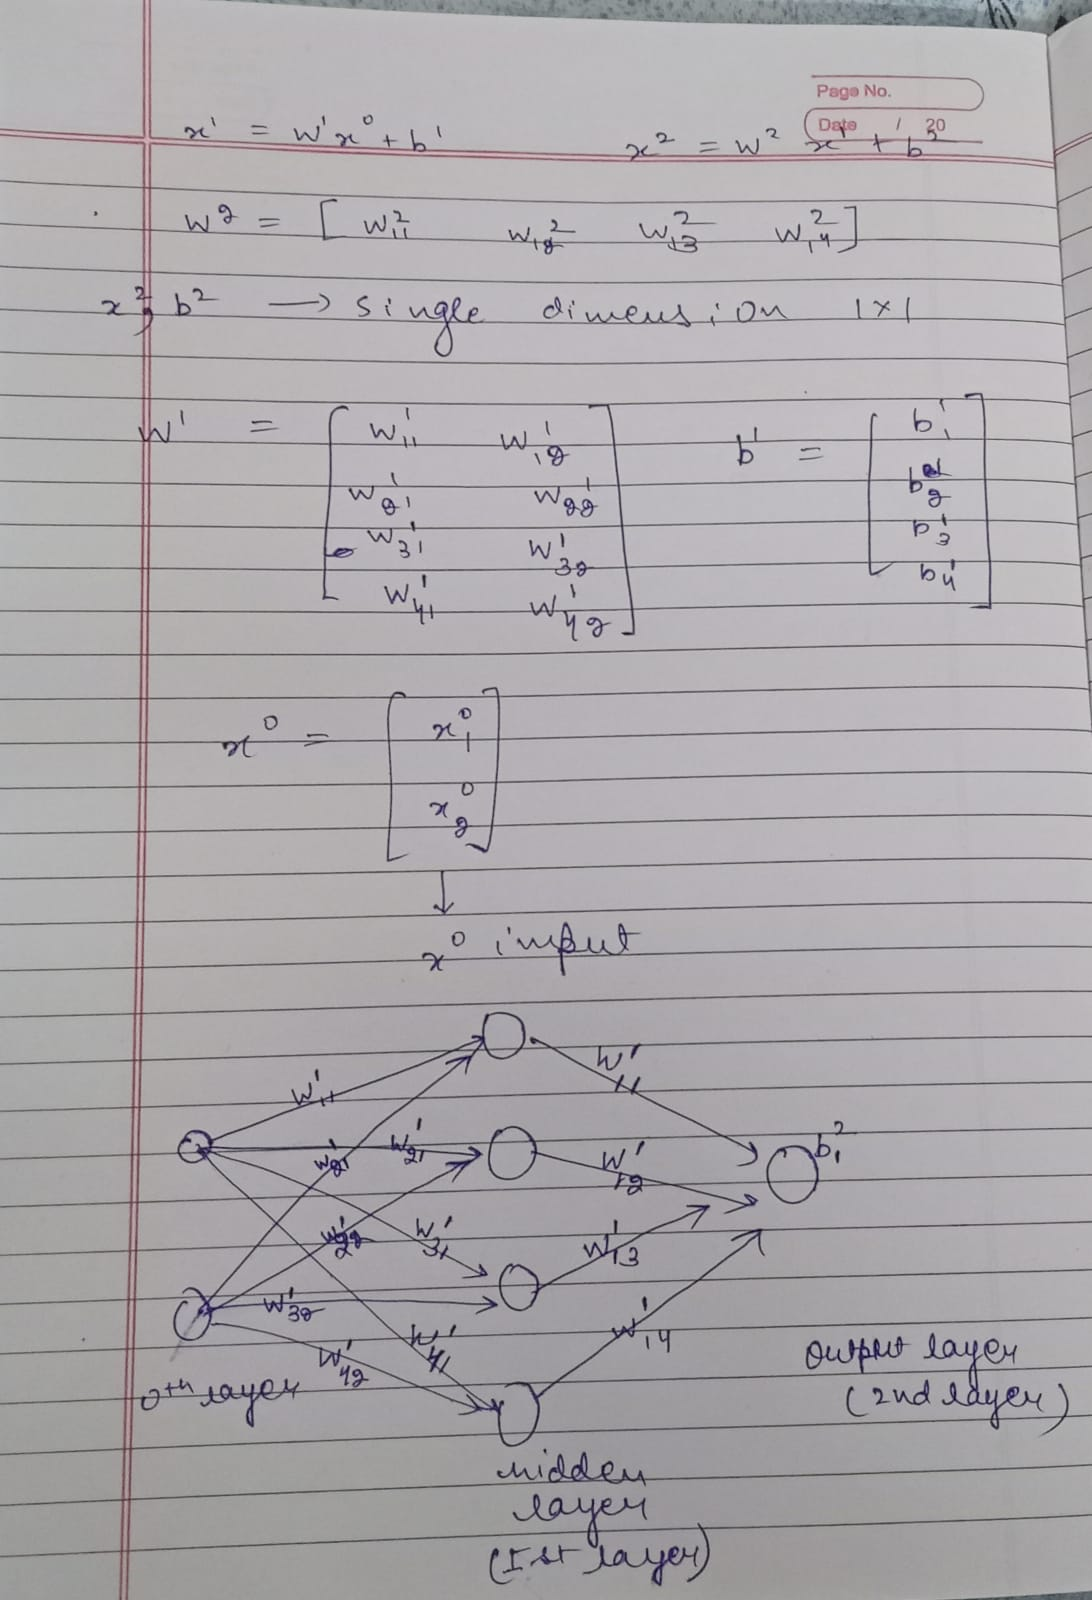

:Used notations are same as class notations. Quick structure of the NN by the following code can find it well in the above pic.
each perceptron is having the ReLu activation function.This is also Stochastic Gradient descent

mean loss(i.e. L)=$\sum log(1+e^{-y_ix^2(x_i)})/1000$ where $x^2$ is output at the second layer and (x_i,y_i) is the ith training point.
$x^2=\sigma(W^2x^1+b^2)$ and $x^1=\sigma(W^1x^0+b^1)$  and $s^1=W^1x^0+b^1$ i.e input to the layer 1 and $s^2=W^2x^1+b^2$ i.e. input to the layer 2

In [ ]:

#collecting all positive and negative points in one numoy array datapts
datapts=np.zeros((2,1000))
datapts[0,0:500]=positive_pts[0,0:500]
datapts[1,0:500]=positive_pts[1,0:500]
datapts[0,500:1000]=negative_pts[0,0:500]
datapts[1,500:1000]=negative_pts[1,0:500]
# its one column is one datapoint

#datapts_label
datapts_label=np.zeros((1000))
datapts_label[0:500]=1
datapts_label[500:1000]=-1

#now we have 1000 datapoints having x and  y coordinates datapots[0] contains all x coordinates all 1000 datapoints


def sigma(x):
 y=np.zeros((len(x),1))
 for i in range(0,len(x)):
  if(x[i][0]>y[i][0]): y[i][0]=x[i][0]
 return y


def loss_L(w1,w2,b1,b2):
   sum=0
   for i in range(0,1000):
      #temp represents the temporary ith datapoint with label label[i]
      temp=np.zeros((2,1))
      temp[0:2,0]=datapts[0:2,i]
      #x_1 represents the output at the 1st layer and x_2 represents the output at layer 2nd and s_1 is the input vector to layer one and s_2 is input vector to the layer 2
      s_1=np.dot(w1,temp)+b1
      x_1=sigma(s_1)
      s_2=np.dot(w2,x_1)+b2
      x_2=sigma(s_2)
      sum=sum+np.log(1+np.exp(-datapts_label[i]*(x_2[0][0])))
   return sum/1000


#x1 represents the output at the 1st layer and x2 represents the output at layer 2nd and s1 is the input vector to layer one and s2 is input vector to the layer 2
w1=np.random.rand(4,2)
w2=np.random.rand(1,4)
b1=np.random.rand(4,1)
b2=np.random.rand(1,1)
x1=np.zeros((4,1))
x2=np.zeros((1,1))
s1=np.zeros((4,1))
s2=np.zeros((1,1))
x0=np.zeros((2,1))
#means gradient of loss for the ith random point wrt x_2..for the following notations.
#s1[k][0] means the input of the kth perceptron in the 1st layer and sigma(s1[k][0])=x1[k][0] which is output of the kth neuron in the 1st layer
grad_L_x2=np.zeros((1,1))
grad_L_x1=np.zeros((4,1))
grad_L_s2=np.zeros((1,1))
grad_L_s1=np.zeros((4,1))
grad_x2_s2=np.zeros((1,1))
grad_L_w2=np.zeros((1,4))
grad_L_w1=np.zeros((4,2))
grad_L_b2=np.zeros((1,1))
grad_L_b1=np.zeros((4,1))
lst=np.arange(1000)
eta=0.001


print("mean logistic loss before tarining",loss_L(w1,w2,b1,b2))

#e stands for no. of epochs
for e in range(0,500):
 #randomising datapts with the help of lst of numbers from 0 to 999 in random order
 datapts=datapts.T
 np.random.shuffle(lst)
 datapts=datapts[lst]
 datapts_label=datapts_label[lst]
 datapts=datapts.T
 for i in range(0,1000):
   x0[0:2,0]=datapts[0:2,i]
   s1=np.dot(w1,x0)+b1
   x1=sigma(s1)
   s2=np.dot(w2,x1)+b2
   x2=sigma(s2)

   grad_L_x2[0][0]=(-datapts_label[i]*np.exp(-datapts_label[i]*x2[0][0] ))/(1+np.exp(-datapts_label[i]*x2[0][0] ))
   

   if(s2[0][0]>0): grad_x2_s2[0][0]=1
   else: grad_x2_s2[0][0]=0


   grad_L_s2[0][0]=grad_L_x2[0][0]*grad_x2_s2[0][0]
   
   for k in range(0,4):
    grad_L_w2[0][k]=grad_L_s2[0][0]*x1[k][0]

   grad_L_b2[0][0]=grad_L_s2[0][0]*1


   for k in range(0,4):
    grad_L_x1[k][0]=grad_L_s2[0][0]*grad_L_w2[0][k]


   for k in range(0,4):
    temp=0
    #s1[k][0] means the input of the kth perceptron in the 1st layer and sigma(s1[k][0])=x1[k][0] which is output of the kth neuron in the 1st layer
    # below is the chain rule to find grad_L_s1[k][0] i.e. gradient of L loss wrt s1[k][0] here temp represents the gradient of x1[k][0] wrt s1[k][0] i.e. grad_x1[k][0]_s1[k][0 ]
    if(s1[k][0]>0): temp=1
    grad_L_s1[k][0]=temp*grad_L_x1[k][0]
   
   for j in range(0,4):
    for k in range(0,2):
     #w1[j][k] is present only in s1[j][0] i.e. in the input to j the perceptron in 1st layer 
     grad_L_w1[j][k]=grad_L_s1[j][0]*x0[k][0]
   
   for j in range(0,4):
    grad_L_b1[j][0]=grad_L_s1[j][0]*1
   
   b2=b2-eta*grad_L_b2
   w2=w2-eta*grad_L_w2
   b1=b1-eta*grad_L_b1
   w1=w1-eta*grad_L_w1

print("mean logistic loss after training",loss_L(w1,w2,b1,b2))
print("parameters"," ","w1:",w1,"w2:",w2,"b1:",b1,"b2:",b2)


#Improved




mean logistic loss before tarining 3.0734610941004945
mean logistic loss after training 0.6931471805599322
parameters   w1: [[-2.74277346e-05 -2.87978641e-06]
 [-2.01202076e-05 -2.11254160e-06]
 [-1.91224551e-05 -2.00784965e-06]
 [-5.07359975e-05 -5.32697097e-06]] w2: [[0.05112839 0.40551735 0.39353402 0.48349827]] b1: [[0.05505347]
 [0.04038586]
 [0.03838428]
 [0.10183698]] b2: [[-0.08455331]]
